# ***Speed dating data explore***
---

In [2]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# importing dataset (converted to .xlsx to get around an encoding issue)
df = pd.read_excel('/content/drive/My Drive/EECE5644_Introduction to Machine Learning and Pattern Recognition/Group project/speed_dating.xlsx')

Mounted at /content/drive


In [3]:
# viewing first 10 rows of dataset
df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,4.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,3.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,10.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,7.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,6.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,1.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,2.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,8.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,9.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# get rows in dataset
len(df.index)

8378

In [5]:
# get # of unique participants
df_no_dupes = df.drop_duplicates(subset=['iid'])
len(df_no_dupes)

551

In [6]:
# Average age of participants
int(df_no_dupes.drop_duplicates(subset=['iid'])["age"].mean())

26

### ***PCA***

        If datasets have lots of variables that we cannot explain, PCA can explain the correlations 
        between the variables by lowering each dimensions. 
        
        Therefore, we execute the PCA to determine the correlation of continuous variables except 
        categorical variables and found that at least 20 dimensions of continuous variables 
        have a correlation. 

        PCA cannot explain which specific continuous variable has meaning, however, 
        it is hopefully meaning that the continuous variables we use are correlated 
        with each other and has their own necessity.

In [7]:
data = df

# data EDA
categorical_variables = ["id", "gender", "match", "samerace", "dec_o", "field", "from", "zipcode", "career", "you_call", "them_cal", "date_3", "undergra"]
pca_data = data.drop(labels=categorical_variables, axis=1)
pca_data = pca_data.fillna(0)
pca_data.head(10)

from sklearn.preprocessing import StandardScaler 
pca_scaler = StandardScaler().fit_transform(pca_data)

# Initiate PCA
pca_column = ["pca1", "pca2", "pca3", "pca4", "pca5"]
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_01 = pca.fit_transform(pca_scaler)
pca_01 = pd.DataFrame(pca_01, columns=pca_column)
pca_01

result = pd.DataFrame({'Explainable variance ratio':pca.explained_variance_,
             'Contribute ratio':pca.explained_variance_ratio_},
             index=pca_column)
result['Accumulative Contribute ratio'] = result['Contribute ratio'].cumsum()
result

,Explainable variance ratio,Contribute ratio,Accumulative Contribute ratio
pca1,29.946145,0.164520,0.164520
pca2,17.599888,0.096691,0.261211
pca3,11.645569,0.063979,0.325190
pca4,9.673406,0.053144,0.378334
pca5,6.598307,0.036250,0.414584


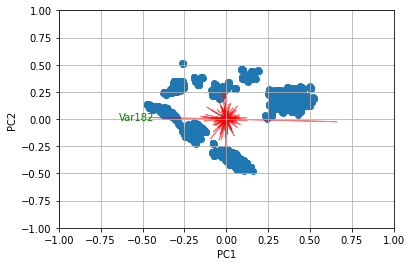

In [11]:
### plot
# Initiate PCA
scaler = StandardScaler()
S = scaler.fit_transform(pca_data)
pca_s = PCA()
pca_s.fit(S)
B = pca_s.transform(S)

# plot 
import matplotlib.pyplot as plt
def biplot(score, coeff, pcax, pcay, labels=None):
    pca1 = pcax-1
    pca2 = pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n = score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    
    plt.scatter(xs*scalex,ys*scaley)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    
    # plot
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(B, pca_s.components_, 1, 2, labels=None)

### ***Data exploration***


In [7]:
# check the amount of unique values for each column

print(df.nunique().to_string())
#df['undergra'].unique()

iid         551
id           22
gender        2
idg          44
condtn        2
wave         21
round        15
position     22
positin1     22
order        22
partner      22
pid         551
match         2
int_corr    155
samerace      2
age_o        24
race_o        5
pf_o_att     94
pf_o_sin     78
pf_o_int     65
pf_o_fun     71
pf_o_amb     82
pf_o_sha     85
dec_o         2
attr_o       18
sinc_o       14
intel_o      17
fun_o        17
amb_o        15
shar_o       15
like_o       18
prob_o       19
met_o         7
age          24
field       259
field_cd     18
undergra    241
mn_sat       68
tuition     115
race          5
imprace      11
imprelig     10
from        269
zipcode     409
income      261
goal          6
date          7
go_out        7
career      367
career_c     17
sports       10
tvsports     10
exercise     10
dining       10
museums      11
art          11
hiking       11
gaming       12
clubbing     11
reading      11
tv           10
theater      11
movies  

In [8]:
# Get target variable
y = df['match']
print(y)

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
8373    0.0
8374    0.0
8375    0.0
8376    0.0
8377    0.0
Name: match, Length: 8378, dtype: float64


In [9]:
# check missing values
df.isnull()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8374,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8375,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### ***Feature processing***

In [10]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

# Get filtered variables for classifier 
XY = df[['match', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]


# Get feature space by dropping useless feature
# to_drop = ['RowNumber','CustomerId','Surname','Exited']
# X = churn_df.drop(to_drop, axis=1)
XY.head()

,match,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,...,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,0.0,0.0,10.0,7.0,4.0,0.14,0.0,27.0,2.0,35.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,10.0,7.0,3.0,0.54,0.0,22.0,2.0,60.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,10.0,7.0,10.0,0.16,1.0,22.0,4.0,19.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,10.0,7.0,5.0,0.61,0.0,23.0,2.0,30.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,10.0,7.0,7.0,0.21,0.0,24.0,3.0,30.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN


In [11]:
print(XY.isnull().sum().to_string())

match          0
gender         0
round          0
position       0
order          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
expnum      6578
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr4_1     1889
sinc4_1     1889
intel4_1    1889
fun4_1      18

In [12]:
XYdrop = XY.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
XYdrop = XYdrop.drop(['from'], axis = 1) #process later
print(XYdrop.isnull().sum().to_string())

match         0
gender        0
round         0
position      0
order         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
age          95
field_cd     82
race         63
imprace      79
imprelig     79
goal         79
date         97
go_out       79
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1      79
intel2_1     79
fun2_1       79
amb2_1       89
shar2_1      89
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
amb3_1      105


In [13]:
XYdrop_nonull = XYdrop.dropna()
XYdrop_nonull

,match,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
0,0.0,0.0,10.0,7.0,4.0,0.14,0.0,27.0,2.0,35.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
1,0.0,0.0,10.0,7.0,3.0,0.54,0.0,22.0,2.0,60.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
2,1.0,0.0,10.0,7.0,10.0,0.16,1.0,22.0,4.0,19.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
3,1.0,0.0,10.0,7.0,5.0,0.61,0.0,23.0,2.0,30.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
4,1.0,0.0,10.0,7.0,7.0,0.21,0.0,24.0,3.0,30.0,...,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,0.0,1.0,22.0,17.0,8.0,0.28,1.0,24.0,2.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8373,0.0,1.0,22.0,14.0,5.0,0.64,0.0,26.0,3.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8374,0.0,1.0,22.0,13.0,4.0,0.71,0.0,24.0,6.0,50.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0
8376,0.0,1.0,22.0,3.0,16.0,0.62,0.0,22.0,4.0,10.0,...,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0


In [14]:
X = XYdrop_nonull.drop(['match'], axis=1)

cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [15]:
Y = XYdrop_nonull['match']
Y

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
8372    0.0
8373    0.0
8374    0.0
8376    0.0
8377    0.0
Name: match, Length: 8024, dtype: float64

### ***Split data***

In [16]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, stratify = Y) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 6018 observation with 57 features
test data has 2006 observation with 57 features


In [17]:
print(y_train.sum()/y_train.shape[0])
print(y_test.sum()/y_test.shape[0])
print(Y.sum()/Y.shape[0])

0.16483881688268529
0.1650049850448654
0.1648803589232303


In [18]:
X_train.head()

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
2172,1.0,16.0,4.0,13.0,0.68,1.0,36.0,2.0,18.18,18.18,...,18.52,18.52,16.67,14.81,16.67,5.0,9.0,8.0,9.0,7.0
4265,1.0,21.0,12.0,9.0,-0.25,0.0,22.0,2.0,25.00,7.00,...,20.00,25.00,25.00,5.00,5.00,8.0,10.0,10.0,10.0,8.0
108,1.0,10.0,1.0,8.0,0.19,0.0,26.0,6.0,20.00,10.00,...,5.00,20.00,20.00,25.00,5.00,8.0,9.0,7.0,8.0,5.0
2284,1.0,16.0,4.0,3.0,0.24,0.0,36.0,2.0,18.18,18.18,...,15.22,15.22,15.22,17.39,15.22,7.0,7.0,7.0,7.0,7.0
5979,0.0,19.0,10.0,13.0,0.85,1.0,23.0,2.0,25.00,14.00,...,0.00,0.00,20.00,0.00,0.00,8.0,9.0,9.0,9.0,7.0


### ***Standarlization***

In [19]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6,100] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [20]:
X_train.head()

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
2172,1.007338,-0.226735,-0.931179,0.729796,1.587529,1.216810,2.683296,-0.617747,-0.337149,0.108762,...,0.750508,0.663325,-0.282222,0.442573,0.767391,-1.518947,0.496561,0.190771,0.537762,-0.326735
4265,1.007338,0.937905,0.519183,-0.001702,-1.491955,-0.821821,-1.231863,-0.617747,0.209654,-1.480891,...,0.966608,1.721830,1.010651,-0.991441,-1.139827,0.659043,1.202182,1.463565,1.466118,0.230604
108,1.007338,-1.624303,-1.475065,-0.184576,-0.034995,-0.821821,-0.113246,2.639737,-0.191228,-1.054329,...,-1.223600,0.905082,0.234617,1.932136,-1.139827,0.659043,0.496561,-0.445626,-0.390595,-1.441413
2284,1.007338,-0.226735,-0.931179,-1.098949,0.130569,-0.821821,2.683296,-0.617747,-0.337149,0.108762,...,0.268662,0.124271,-0.507272,0.819715,0.530419,-0.066954,-0.914681,-0.445626,-1.318951,-0.326735
5979,-0.992715,0.472049,0.156592,0.729796,2.150446,1.216810,-0.952209,-0.617747,0.209654,-0.485581,...,-1.953669,-2.361909,0.234617,-1.722336,-1.956972,0.659043,0.496561,0.827168,0.537762,-0.326735
